In [1]:
import mph

client = mph.start()
model = client.load('System_test.mph')
mph.tree(model)

System_test
├─ parameters
│  └─ Rate constants
├─ functions
├─ components
│  └─ Component 
├─ geometries
├─ views
│  └─ View 2D 1
├─ selections
├─ coordinates
├─ variables
├─ couplings
├─ physics
│  └─ Reaction Engineering
│     ├─ Initial Values 
│     ├─ Species: Q
│     ├─ Species: DH
│     ├─ Species: Qm
│     ├─ Species: DHp
│     ├─ Species: QH
│     ├─ Species: D
│     ├─ Species: QHD
│     ├─ Species: QHH
│     ├─ Species: prod
│     ├─ Species: QD
│     ├─ Ke: Q + DH => Qm + DHp
│     ├─ KH: Qm + DHp => QH + D
│     ├─ Kr: QH + D => QHD
│     ├─ Kp: QHD =>QHH + prod
│     ├─ KqH//Kdisp: Q + QHH <=> 2 QH
│     ├─ Kph: Q => prod
│     ├─ Ks: Q + QHD =>QH + QD
│     ├─ Kd//Kc: QD <=>Q + D
│     └─ KrD: 2 D => prod
├─ multiphysics
├─ materials
├─ meshes
├─ studies
│  └─ Study control
│     ├─ Parametric Sweep
│     └─ Time Dependent
├─ solutions
│  ├─ Solution 1
│  │  ├─ Compile Equations: Time Dependent
│  │  ├─ Dependent Variables 1
│  │  │  ├─ Concentration (comp.ODE1)
│  │  │ 

In [44]:
reactions = model / 'physics' / 'Reaction Engineering' 
reactions.properties()

{}

In [3]:
eval_group = model / 'evaluations'
# eval_group.

In [4]:
model.studies()

['Study control']

In [5]:
study = model / 'studies' / 'Study control'
study.children()

[Node('studies/Study control/Parametric Sweep'),
 Node('studies/Study control/Time Dependent')]

In [6]:
sweep = study / 'Parametric Sweep'
sweep.toggle(action='off')

In [7]:
mph.tree(model)

System_test
├─ parameters
│  └─ Rate constants
├─ functions
├─ components
│  └─ Component 
├─ geometries
├─ views
│  └─ View 2D 1
├─ selections
├─ coordinates
├─ variables
├─ couplings
├─ physics
│  └─ Reaction Engineering
│     ├─ Initial Values 
│     ├─ Species: Q
│     ├─ Species: DH
│     ├─ Species: Qm
│     ├─ Species: DHp
│     ├─ Species: QH
│     ├─ Species: D
│     ├─ Species: QHD
│     ├─ Species: QHH
│     ├─ Species: prod
│     ├─ Species: QD
│     ├─ Ke: Q + DH => Qm + DHp
│     ├─ KH: Qm + DHp => QH + D
│     ├─ Kr: QH + D => QHD
│     ├─ Kp: QHD =>QHH + prod
│     ├─ KqH//Kdisp: Q + QHH <=> 2 QH
│     ├─ Kph: Q => prod
│     ├─ Ks: Q + QHD =>QH + QD
│     ├─ Kd//Kc: QD <=>Q + D
│     └─ KrD: 2 D => prod
├─ multiphysics
├─ materials
├─ meshes
├─ studies
│  └─ Study control
│     ├─ Parametric Sweep
│     └─ Time Dependent
├─ solutions
│  ├─ Solution 1
│  │  ├─ Compile Equations: Time Dependent
│  │  ├─ Dependent Variables 1
│  │  │  ├─ Concentration (comp.ODE1)
│  │  │ 

In [8]:
sweep.properties()

{'accumtable': 'new',
 'accumtableall': True,
 'clearprevrom': False,
 'defsolvergen': 'global',
 'filename': WindowsPath('C:/Users/STRANGER/Documents/param.mph'),
 'keepgenrom': False,
 'keeprom': 'off',
 'keepsol': 'all',
 'loadFile': None,
 'outputhide': 'off',
 'paramselect': 'off',
 'pdistrib': False,
 'plist': array([], dtype=float64),
 'plistarr': array([[0.0, 1e-05, 2e-05, 3.0000000000000004e-05, 4e-05, 5e-05,
         6.000000000000001e-05, 7.000000000000001e-05, 8e-05, 9e-05,
         0.0001]], dtype=object),
 'plistarrexcelcalculatedvalues': False,
 'plistarrexcelfilename': None,
 'plistarrexcelincludeheaders': False,
 'plistarrexceloverwrite': True,
 'plistarrexcelrange': None,
 'plistarrexcelseparateunits': False,
 'plistarrexcelsheet': None,
 'plot': 'off',
 'plotgroup': 'pg1',
 'pname': ['light'],
 'probes': [],
 'probesel': 'none',
 'punit': [''],
 'reusesol': False,
 'romtagsuffix': 'parnameval',
 'save': 'off',
 'saveFile': None,
 'sweeptype': 'filled',
 'switchcase':

In [9]:
model.solve()

In [27]:
a = model.evaluate(['t', 'reaction.c_Q'])


In [11]:
import matplotlib.pyplot as plt

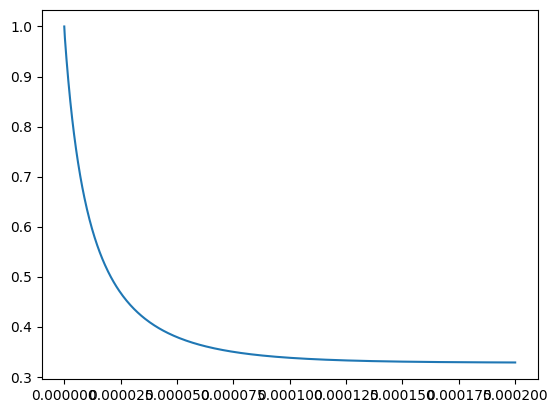

In [28]:
plt.plot(a[:, 0], a[:, 1])


In [19]:
from scipy import integrate
import numpy as np

In [29]:
x, y = a[:, 0], a[:, 1]
mask  =x<1e-4
x= x[mask]
y= y[mask]
integrate.simps(y,x,even='avg')

4.373721483118488e-05

In [38]:
integrate.simps(y)

484.14021815112284

In [32]:
c= [
    integrate.simps(y[:i],x[:i],even='avg')
    for i in range (1,len(x)+1)
]

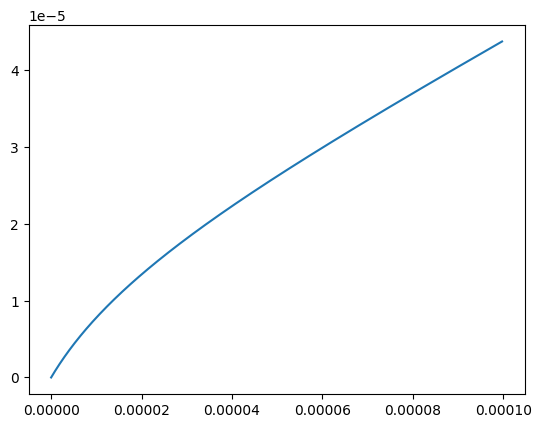

In [34]:
plt.plot(x,c)

In [43]:
print(np.stack((x,c)).T)

[[0.00000000e+00 0.00000000e+00]
 [1.95312500e-10 1.95310593e-10]
 [3.40469848e-10 3.40464053e-10]
 ...
 [9.82720760e-05 4.32385524e-05]
 [9.90095421e-05 4.34879691e-05]
 [9.97470083e-05 4.37372148e-05]]


In [14]:
b = model.evaluate(['t', 'timeint(0, 1e-4,reaction.c_Q)'])


In [50]:
d = reactions.children()

In [52]:
d_list =[i.name() for i in d ]

In [53]:
import re

In [55]:
species = re.findall(string='\n'.join(d_list),pattern='Species: (.*)' )